In [276]:
import re
import matplotlib.pyplot as plt
import torch
from helpers import letter_sorted
from helpers import plot_bigrams

In [277]:
with open('data/turkce_isim_veri_seti/tr_isimler.txt', 'r', encoding='utf-8') as file:
    text = file.read()
names = re.split(r'\n', text)

In [278]:
names[:15]

['hüsne',
 'basiri',
 'sibel',
 'yekta',
 'mahpeyker',
 'ufkun',
 'burha',
 'ümmü',
 'ebrar',
 'nursel',
 'aykut',
 'anıl',
 'şahvelet',
 'sadettin',
 'uçar']

Let's check some name statistics.

In [279]:
name_lengths = [len(n) for n in names]
longest_names = [n for n in names if len(n) == max(name_lengths)]
shortest_names = [n for n in names if len(n) == min(name_lengths)]
print(f"Average name length: {sum(name_lengths)/len(name_lengths):.2f} characters")
print(f"Longest names ({len(longest_names[0])} characters): {longest_names}")
print(f"Shortest names ({len(shortest_names[0])} characters): {shortest_names}")

Average name length: 5.88 characters
Longest names (13 characters): ['abdulmuttalip', 'sebahittincan']
Shortest names (2 characters): ['su', 'iz']


## Bigram Analysis

### Character Frequencies 

In [280]:
all_chars = ''.join(names)

In [281]:
char_freq ={}
for c in all_chars:
    char_freq[c] = char_freq.get(c, 0) + 1
char_freq = dict(sorted(char_freq.items(), key=lambda t:t[1], reverse=True))
chars = letter_sorted(char_freq)

In [282]:
char_freq

{'a': 1813,
 'e': 1530,
 'i': 1115,
 'n': 1007,
 'r': 878,
 'l': 706,
 'm': 639,
 't': 585,
 's': 533,
 'h': 510,
 'u': 475,
 'y': 471,
 'd': 471,
 'b': 371,
 'ü': 357,
 'k': 345,
 'z': 313,
 'f': 247,
 'g': 222,
 'ş': 191,
 'c': 169,
 'v': 157,
 'ı': 117,
 'o': 100,
 'p': 80,
 'ç': 68,
 'ö': 66,
 'ğ': 61,
 'j': 23}

In [283]:
len(char_freq.keys())

29

In [284]:
chars

{'a': 1813,
 'b': 371,
 'c': 169,
 'ç': 68,
 'd': 471,
 'e': 1530,
 'f': 247,
 'g': 222,
 'ğ': 61,
 'h': 510,
 'ı': 117,
 'i': 1115,
 'j': 23,
 'k': 345,
 'l': 706,
 'm': 639,
 'n': 1007,
 'o': 100,
 'ö': 66,
 'p': 80,
 'r': 878,
 's': 533,
 'ş': 191,
 't': 585,
 'u': 475,
 'ü': 357,
 'v': 157,
 'y': 471,
 'z': 313}

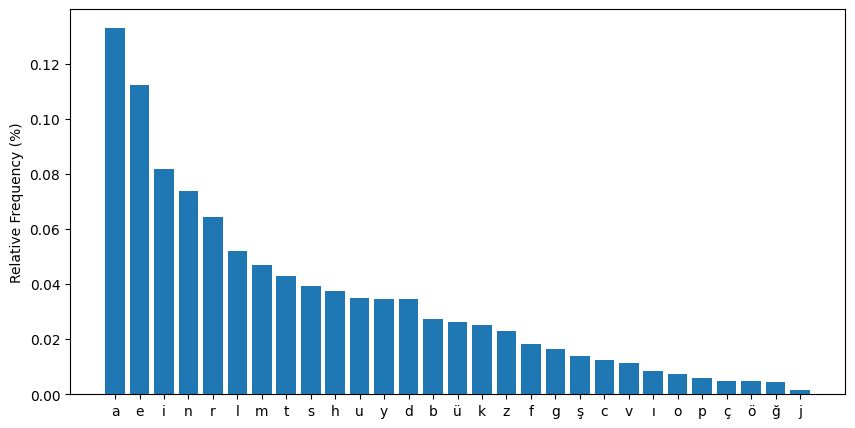

In [285]:
k = [k for k in char_freq.keys()]
v = [v/sum(char_freq.values()) for v in char_freq.values()]

plt.figure(figsize=(10, 5))
plt.bar(k, v)
plt.ylabel("Relative Frequency (%)")
plt.show()

### Bigram Calculation

Let's investigate the first example more closely:

In [286]:
print(names[0])

hüsne


It is important to note that the we need two characters to create bigrams, `f-a-d-i-m-e` where the bigrams become:
```
<NULL> -> f     
f      -> a     
a      -> d     
d      -> i     
i      -> m     
m      -> e     
e      -> <NULL>
```
where the special token `<NULL>` represents the non-existent characters. Here, instead of the `<NULL>` token, we can use start and finish tokens `<B> (BAS)` and `<S> (SON)`, respectively.
```
<B>    -> f  
f      -> a  
a      -> d  
d      -> i  
i      -> m  
m      -> e  
e      -> <S>
```

In [ ]:
B_dict = {} # Bigram data
for n in names:
    token = ['<B>'] + list(n) + ['<S>']
    for char1, char2 in zip(token, token[1:]):
        print(char1 + ' -> ' + char2)
        bigram = (char1, char2)
        B_dict[bigram] = B_dict.get(bigram, 0) + 1

In [ ]:
B_freq = sorted(B_dict.items(), key=lambda item:item[1], reverse=True)
B_freq

Instead of having a dictionary/list storing the bigram information in a 2D array would benefit us much better. In order to do that, we might need two look-up tables, which would map characters-to-indices and indices-to-characters:

In [289]:
# Indice to char mapping
char2ind = {c:i for i, c in enumerate(chars.keys())}
char2ind['<B>'] = 29
char2ind['<S>'] = 30
char2ind

{'a': 0,
 'b': 1,
 'c': 2,
 'ç': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'ğ': 8,
 'h': 9,
 'ı': 10,
 'i': 11,
 'j': 12,
 'k': 13,
 'l': 14,
 'm': 15,
 'n': 16,
 'o': 17,
 'ö': 18,
 'p': 19,
 'r': 20,
 's': 21,
 'ş': 22,
 't': 23,
 'u': 24,
 'ü': 25,
 'v': 26,
 'y': 27,
 'z': 28,
 '<B>': 29,
 '<S>': 30}

In [290]:
ind2char = {i:c for i, c in enumerate(char2ind.keys())}
ind2char

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'ç',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'ğ',
 9: 'h',
 10: 'ı',
 11: 'i',
 12: 'j',
 13: 'k',
 14: 'l',
 15: 'm',
 16: 'n',
 17: 'o',
 18: 'ö',
 19: 'p',
 20: 'r',
 21: 's',
 22: 'ş',
 23: 't',
 24: 'u',
 25: 'ü',
 26: 'v',
 27: 'y',
 28: 'z',
 29: '<B>',
 30: '<S>'}

In [291]:
char2ind['a']

0

In [292]:
nchars = len(char2ind.keys())
B = torch.zeros((nchars, nchars))
for idx in range(len(B_freq)):
    bigram = B_freq[idx][0]
    gram1 = bigram[0]
    gram2 = bigram[1]
    B[char2ind[gram1], char2ind[gram2]] = B_freq[idx][1]

In [293]:
B

tensor([[  7.,  92.,  17.,   7.,  69.,   5.,  36.,   9.,  16., 139.,   0.,  34.,
           1.,  49., 148.,  73., 361.,   0.,   0.,  11., 113.,  64.,  27., 110.,
           1.,   1.,  16., 157.,  68.,   0., 182.],
        [ 80.,   4.,   0.,   0.,  55., 115.,   0.,   0.,   0.,   1.,   2.,  55.,
           0.,   0.,   0.,   0.,   1.,   6.,   0.,   0.,  11.,   0.,   0.,   0.,
          26.,   8.,   0.,   0.,   0.,   0.,   7.],
        [ 63.,   1.,   0.,   0.,   1.,  58.,   0.,   0.,   0.,   0.,   3.,  21.,
           0.,   0.,   2.,   3.,   0.,   2.,   1.,   0.,   3.,   0.,   0.,   0.,
           5.,   5.,   1.,   0.,   0.,   0.,   0.],
        [ 14.,   0.,   0.,   0.,   0.,  12.,   0.,   0.,   0.,   0.,   2.,  12.,
           0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           3.,   1.,   0.,   0.,   0.,   0.,  21.],
        [ 77.,   1.,   0.,   0.,  28.,  95.,   0.,   0.,   0.,   1.,  18., 112.,
           0.,   0.,   0.,   0.,   1.,  13.,   2.,   0.,  11., 

In [294]:
B.shape

torch.Size([31, 31])

Let's visualize the bigram frequency statistics

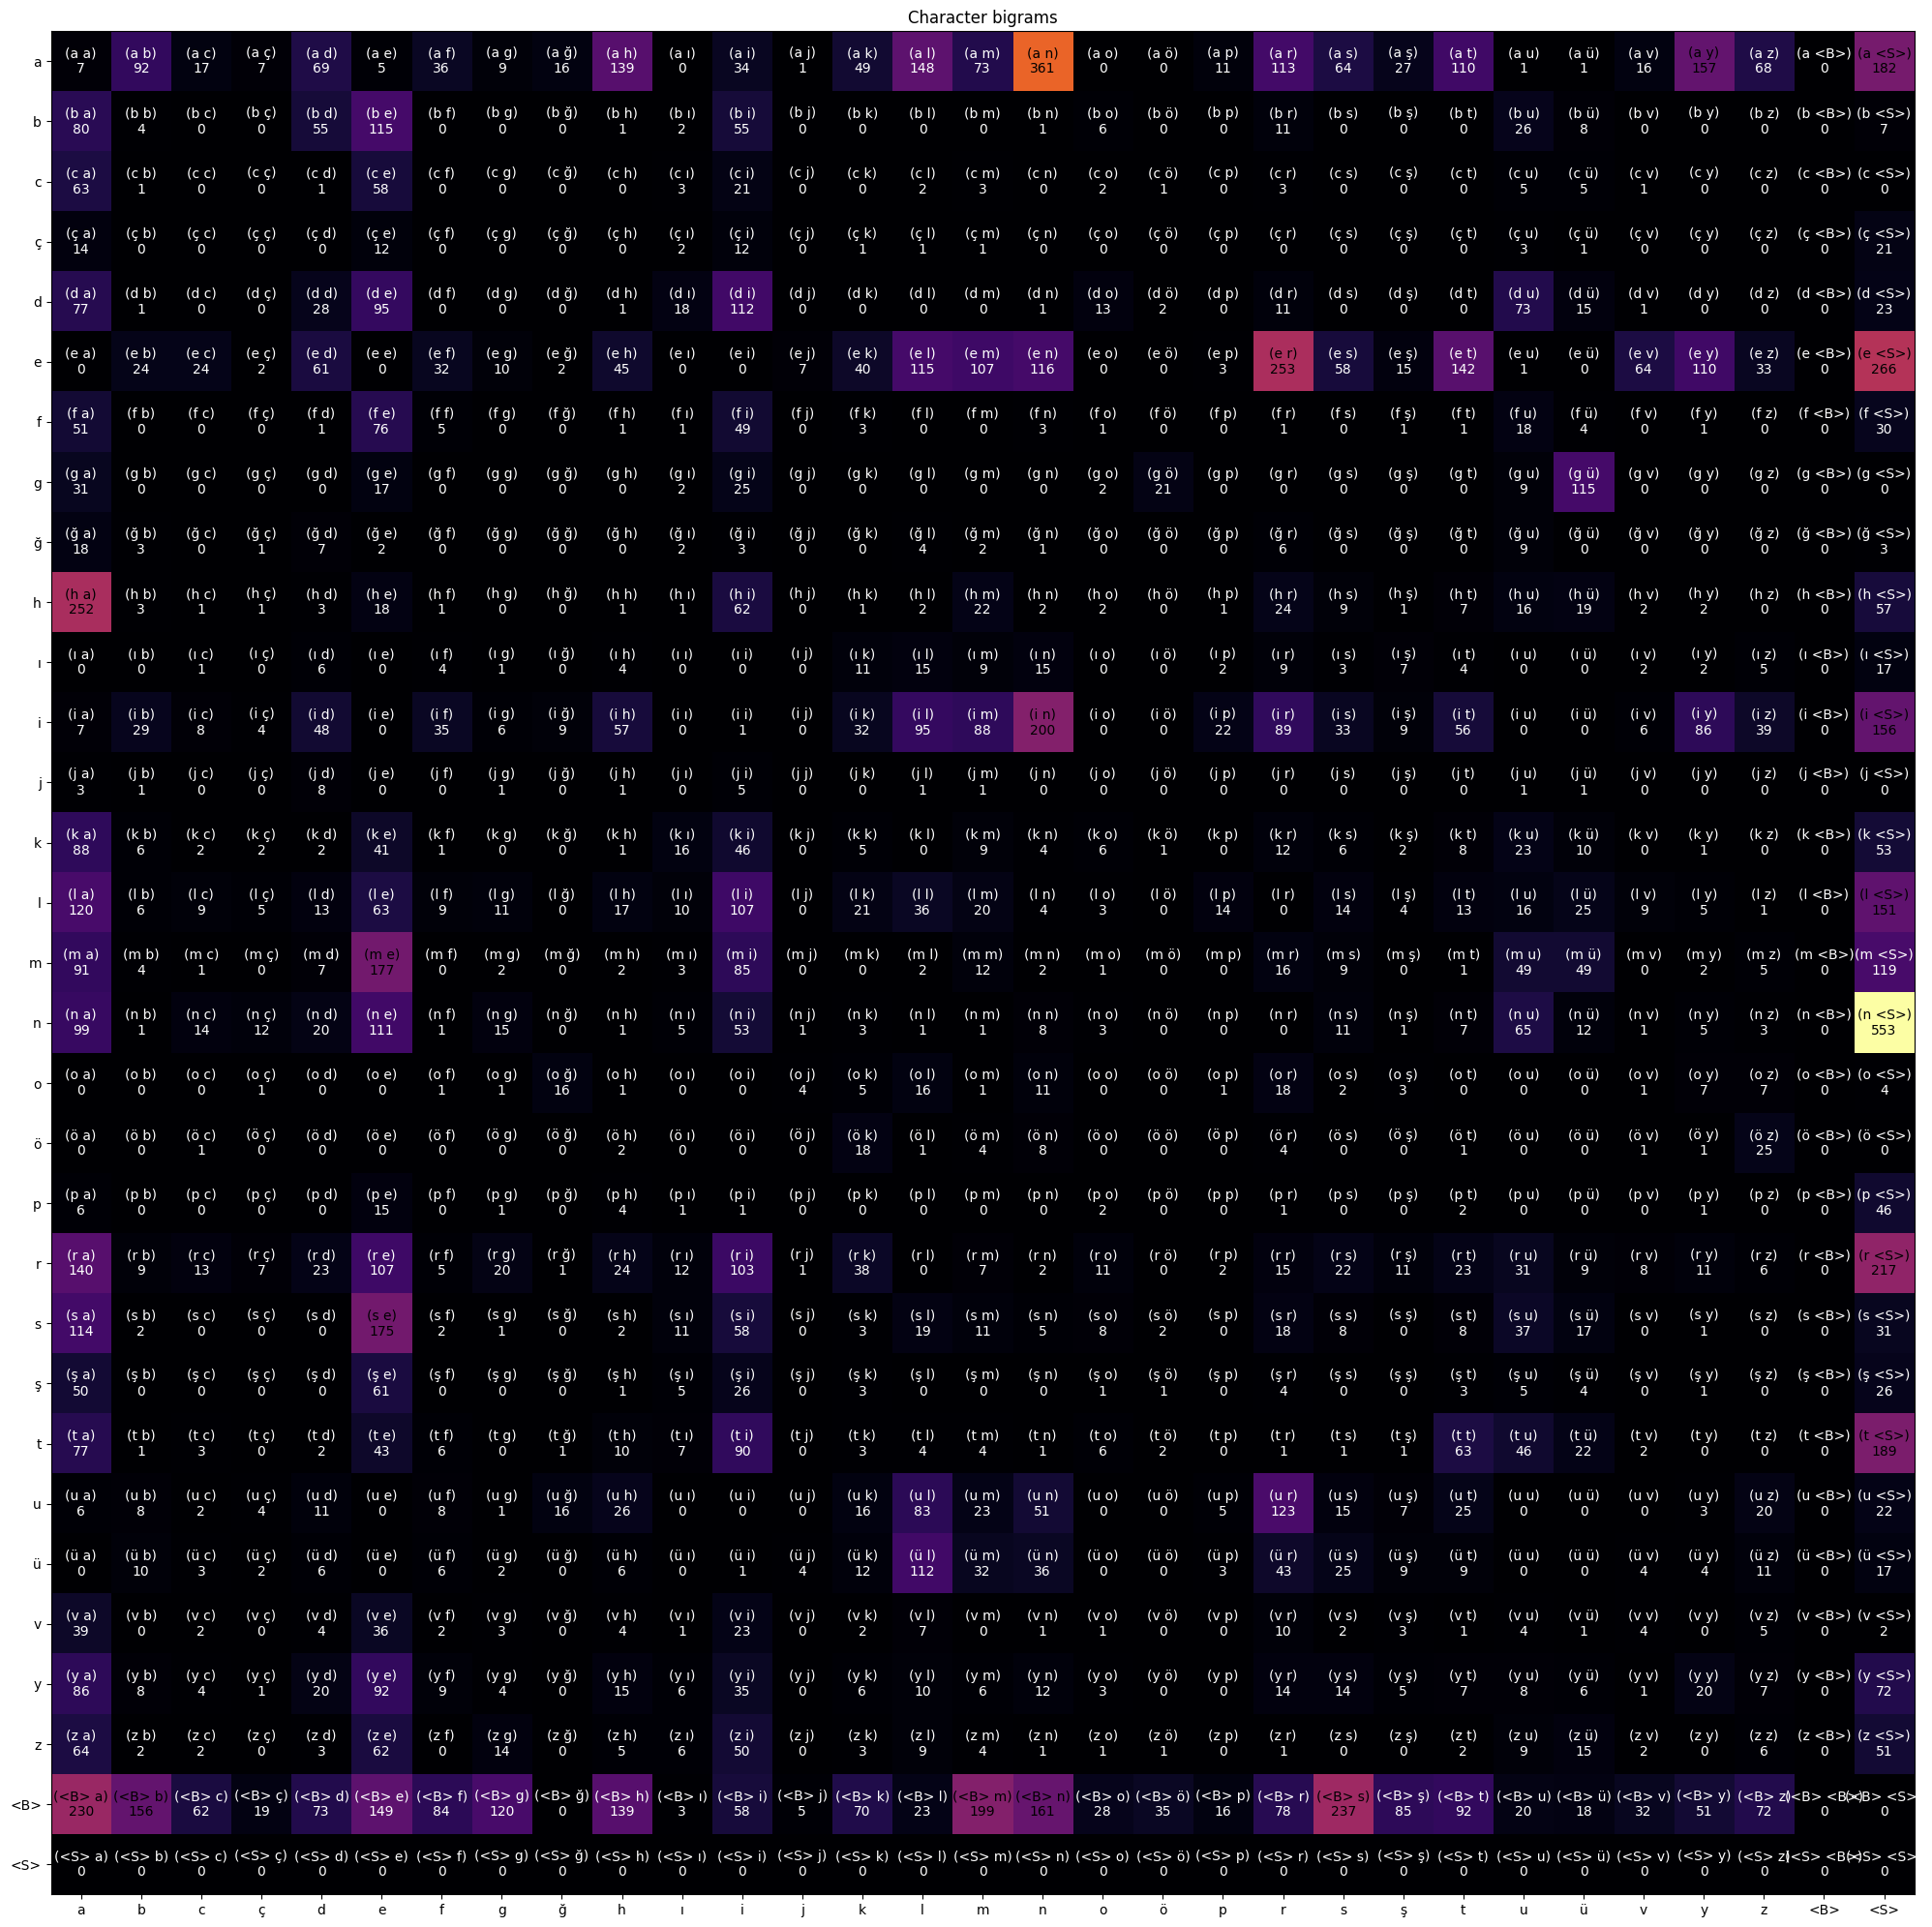

In [295]:
ext_chars = list(char2ind.keys())
fig, ax = plt.subplots(figsize=(25, 25))
ax = plot_bigrams(B, ext_chars, ax)
plt.show()

Let's confirm the results manually:

In [296]:
first_letter = {}
for n in names:
    first_letter[n[0]] = first_letter.get(n[0], 0) + 1
first_letter = dict(sorted(first_letter.items(), key=lambda it:it[1], reverse=True))

In [297]:
first_letter

{'s': 237,
 'a': 230,
 'm': 199,
 'n': 161,
 'b': 156,
 'e': 149,
 'h': 139,
 'g': 120,
 't': 92,
 'ş': 85,
 'f': 84,
 'r': 78,
 'd': 73,
 'z': 72,
 'k': 70,
 'c': 62,
 'i': 58,
 'y': 51,
 'ö': 35,
 'v': 32,
 'o': 28,
 'l': 23,
 'u': 20,
 'ç': 19,
 'ü': 18,
 'p': 16,
 'j': 5,
 'ı': 3}

Let's take a look at the bigrams table above:
- We notice that a name would never start with an end token (`<S>`), thus, the row consists of all zeros.
- Similarly, we have a column of zeros since no name will ever end with the starting token (`<B>`), thus, the column consists of all zeros.
- The only valid combinations for the the tokens are:
    - `<B>abc<S>` where any combination of `<S>abc<B>` are invalid.
    - Also, `<B><S>`, where it is a name with no letters.

We can use a better approach to fix those problems. Instead of having two special tokens we will have a single `.` token to imply it is the beginning/end of a word.

In [298]:
# Indice to char mapping
char2ind = {}
char2ind = {c:i for i, c in enumerate(chars, start=1)}
char2ind['.'] = 0
char2ind = dict(sorted(char2ind.items(), key=lambda item:item[1]))
char2ind

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'ç': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'g': 8,
 'ğ': 9,
 'h': 10,
 'ı': 11,
 'i': 12,
 'j': 13,
 'k': 14,
 'l': 15,
 'm': 16,
 'n': 17,
 'o': 18,
 'ö': 19,
 'p': 20,
 'r': 21,
 's': 22,
 'ş': 23,
 't': 24,
 'u': 25,
 'ü': 26,
 'v': 27,
 'y': 28,
 'z': 29}

In [299]:
ind2char = {}
ind2char = {i:c for c, i in char2ind.items()}
ind2char

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'ç',
 5: 'd',
 6: 'e',
 7: 'f',
 8: 'g',
 9: 'ğ',
 10: 'h',
 11: 'ı',
 12: 'i',
 13: 'j',
 14: 'k',
 15: 'l',
 16: 'm',
 17: 'n',
 18: 'o',
 19: 'ö',
 20: 'p',
 21: 'r',
 22: 's',
 23: 'ş',
 24: 't',
 25: 'u',
 26: 'ü',
 27: 'v',
 28: 'y',
 29: 'z'}

In [300]:
token_count = {}
for name in names:
    token = ["."] + list(name) + ["."]
    for char1, char2 in zip(token, token[1:]):
        token_count[(char1, char2)] = token_count.get((char1, char2), 0) + 1
token_count = dict(sorted(token_count.items(), key=lambda item:item[1], reverse=True))
token_count

{('n', '.'): 553,
 ('a', 'n'): 361,
 ('e', '.'): 266,
 ('e', 'r'): 253,
 ('h', 'a'): 252,
 ('.', 's'): 237,
 ('.', 'a'): 230,
 ('r', '.'): 217,
 ('i', 'n'): 200,
 ('.', 'm'): 199,
 ('t', '.'): 189,
 ('a', '.'): 182,
 ('m', 'e'): 177,
 ('s', 'e'): 175,
 ('.', 'n'): 161,
 ('a', 'y'): 157,
 ('.', 'b'): 156,
 ('i', '.'): 156,
 ('l', '.'): 151,
 ('.', 'e'): 149,
 ('a', 'l'): 148,
 ('e', 't'): 142,
 ('r', 'a'): 140,
 ('.', 'h'): 139,
 ('a', 'h'): 139,
 ('u', 'r'): 123,
 ('l', 'a'): 120,
 ('.', 'g'): 120,
 ('m', '.'): 119,
 ('e', 'n'): 116,
 ('b', 'e'): 115,
 ('e', 'l'): 115,
 ('g', 'ü'): 115,
 ('s', 'a'): 114,
 ('a', 'r'): 113,
 ('d', 'i'): 112,
 ('ü', 'l'): 112,
 ('n', 'e'): 111,
 ('e', 'y'): 110,
 ('a', 't'): 110,
 ('r', 'e'): 107,
 ('e', 'm'): 107,
 ('l', 'i'): 107,
 ('r', 'i'): 103,
 ('n', 'a'): 99,
 ('d', 'e'): 95,
 ('i', 'l'): 95,
 ('y', 'e'): 92,
 ('.', 't'): 92,
 ('a', 'b'): 92,
 ('m', 'a'): 91,
 ('t', 'i'): 90,
 ('i', 'r'): 89,
 ('i', 'm'): 88,
 ('k', 'a'): 88,
 ('y', 'a'): 86,
 ('i

In [301]:
nchars = len(char2ind.keys())
B = torch.zeros((nchars, nchars))
for idx in range(len(token_count.keys())):
    bigram = list(token_count.keys())[idx]
    gram1 = bigram[0]
    gram2 = bigram[1]
    B[char2ind[gram1], char2ind[gram2]] = list(token_count.values())[idx]
B

tensor([[  0., 230., 156.,  62.,  19.,  73., 149.,  84., 120.,   0., 139.,   3.,
          58.,   5.,  70.,  23., 199., 161.,  28.,  35.,  16.,  78., 237.,  85.,
          92.,  20.,  18.,  32.,  51.,  72.],
        [182.,   7.,  92.,  17.,   7.,  69.,   5.,  36.,   9.,  16., 139.,   0.,
          34.,   1.,  49., 148.,  73., 361.,   0.,   0.,  11., 113.,  64.,  27.,
         110.,   1.,   1.,  16., 157.,  68.],
        [  7.,  80.,   4.,   0.,   0.,  55., 115.,   0.,   0.,   0.,   1.,   2.,
          55.,   0.,   0.,   0.,   0.,   1.,   6.,   0.,   0.,  11.,   0.,   0.,
           0.,  26.,   8.,   0.,   0.,   0.],
        [  0.,  63.,   1.,   0.,   0.,   1.,  58.,   0.,   0.,   0.,   0.,   3.,
          21.,   0.,   0.,   2.,   3.,   0.,   2.,   1.,   0.,   3.,   0.,   0.,
           0.,   5.,   5.,   1.,   0.,   0.],
        [ 21.,  14.,   0.,   0.,   0.,   0.,  12.,   0.,   0.,   0.,   0.,   2.,
          12.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
      

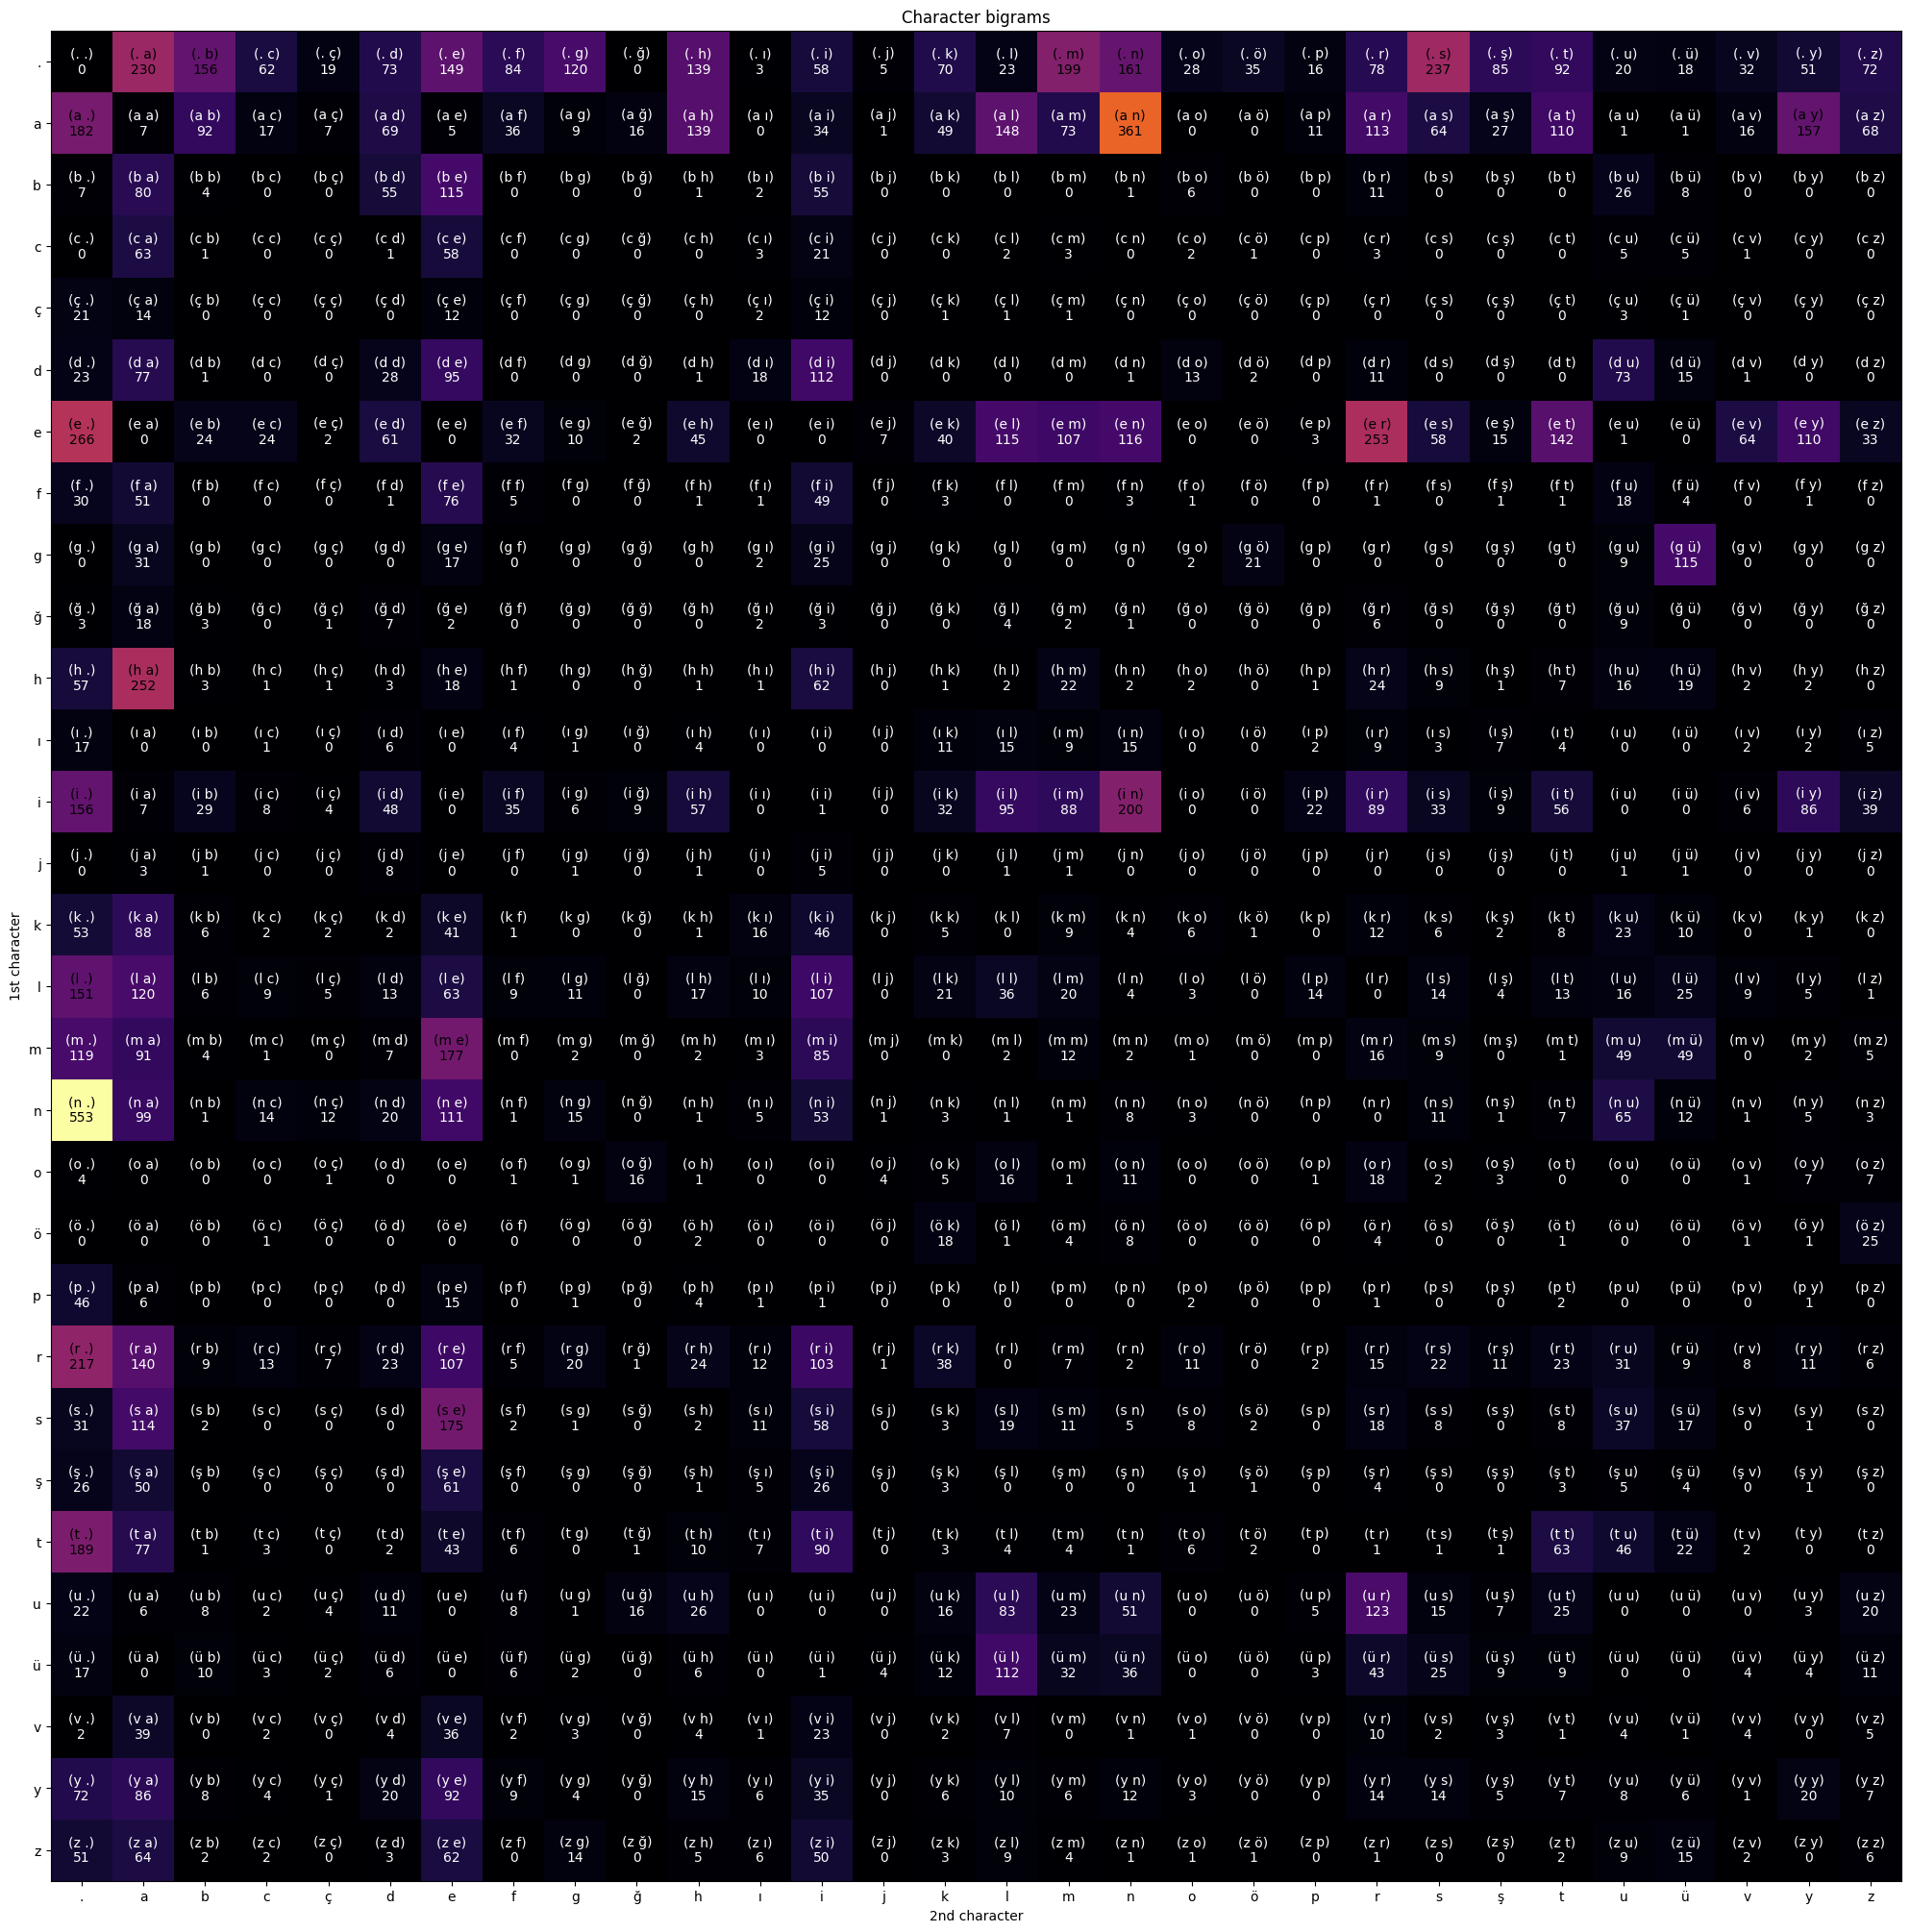

In [302]:
fig, ax = plt.subplots(figsize=(25, 25))
ax = plot_bigrams(B, list(char2ind.keys()), ax)
plt.ylabel("1st character")
plt.xlabel("2nd character")
plt.show()

The table above presents a distribution mapping the initial characters of names (rows) against their terminal characters (columns). Analysis reveals that:
- Names most commonly begin with the character `s` (count 119)
- Names most frequently end with the character `n` (count 263)

Since we've created the bigram relationships, now we want to sample from this statistical distribution, which will correspond to generation of synthetic Turkish names from the data. Thus, the first step will be converting the counts into probabilities:

In [303]:
P = -torch.ones((len(char2ind.keys()),len(char2ind.keys())))
for idx in range(len(char2ind.keys())):
    P[idx] = B[idx].float()/sum(B[idx])
P

tensor([[0.0000e+00, 9.9352e-02, 6.7387e-02, 2.6782e-02, 8.2073e-03, 3.1533e-02,
         6.4363e-02, 3.6285e-02, 5.1836e-02, 0.0000e+00, 6.0043e-02, 1.2959e-03,
         2.5054e-02, 2.1598e-03, 3.0238e-02, 9.9352e-03, 8.5961e-02, 6.9546e-02,
         1.2095e-02, 1.5119e-02, 6.9114e-03, 3.3693e-02, 1.0238e-01, 3.6717e-02,
         3.9741e-02, 8.6393e-03, 7.7754e-03, 1.3823e-02, 2.2030e-02, 3.1102e-02],
        [1.0039e-01, 3.8610e-03, 5.0745e-02, 9.3767e-03, 3.8610e-03, 3.8058e-02,
         2.7579e-03, 1.9857e-02, 4.9641e-03, 8.8252e-03, 7.6669e-02, 0.0000e+00,
         1.8753e-02, 5.5157e-04, 2.7027e-02, 8.1633e-02, 4.0265e-02, 1.9912e-01,
         0.0000e+00, 0.0000e+00, 6.0673e-03, 6.2328e-02, 3.5301e-02, 1.4892e-02,
         6.0673e-02, 5.5157e-04, 5.5157e-04, 8.8252e-03, 8.6597e-02, 3.7507e-02],
        [1.8868e-02, 2.1563e-01, 1.0782e-02, 0.0000e+00, 0.0000e+00, 1.4825e-01,
         3.0997e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.6954e-03, 5.3908e-03,
         1.4825e-01, 0.000

Let's check the sum of each column to make sure that each row corresponds to a PDF.

Now, we will be using the `torch.multinomial()` function to sample the distribution. Before, we do that we will define a generator object to make sure the results are repeatable:

In [304]:
g = torch.Generator().manual_seed(123)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.2782, 0.4853, 0.2365])

In [305]:
torch.sum(p, 0)

tensor(1.0000)

In [306]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 2, 0, 2, 2, 0, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 2, 2, 1,
        0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0,
        1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 2, 0])

Let's sample the character distribution!

In [307]:
probs.shape

torch.Size([30, 30])

In [308]:
g = torch.Generator().manual_seed(12345678)

for i in range(20):
    idx = 0 # initial character index
    generated_name = []
    while True:
        generated_name.append(ind2char[idx])
        probs = B[idx].float()/sum(B[idx]) # bigram distribution
        # probs = torch.ones((30,)) / 30.0 # uniform distribution
        idx_new = torch.multinomial(probs, num_samples=1, replacement=True, generator=g)
        # print(f"Probability: {probs[idx_new.item()]:.4f}")
        idx = idx_new.item()
        if idx == 0:
            generated_name.append(ind2char[idx])
            break
    print(''.join(generated_name))

.cerindı.
.yr.
.onu.
.fizen.
.tin.
.tel.
.met.
.doğuletmm.
.şadanulimehiyyat.
.nami.
.giyunç.
.balahey.
.rhahaysahmütın.
.sezan.
.nahmmevebase.
.ayinul.
.fetur.
.vezerelan.
.bdih.
.ücar.


In [309]:
B.shape

torch.Size([30, 30])

Let's review our generator and improve the mechanics:

In [310]:
P = torch.zeros((B.shape[0], B.shape[1]))
P = B.float() / torch.sum(B, 1, keepdim=True) # (30, 30) / (1, 30) sum-divide boardcasts
torch.sum(P, 1) # normalized rows

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000])

In [311]:
a = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(a)
print(f"dim: 0, {torch.sum(a, 0)}")
print(f"dim: 1, {torch.sum(a, 1)}")

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
dim: 0, tensor([12, 15, 18])
dim: 1, tensor([ 6, 15, 24])


In [312]:

g = torch.Generator().manual_seed(12345678)

for i in range(20):
    idx = 0 # initial character index
    generated_name = []
    while True:
        generated_name.append(ind2char[idx])
        probs = P[idx] # bigram distribution
        # probs = torch.ones((30,)) / 30.0 # uniform distribution
        idx_new = torch.multinomial(probs, num_samples=1, replacement=True, generator=g)
        # print(f"Probability: {probs[idx_new.item()]:.4f}")
        idx = idx_new.item()
        if idx == 0:
            generated_name.append(ind2char[idx])
            break
    print(''.join(generated_name))

.cerindı.
.yr.
.onu.
.fizen.
.tin.
.tel.
.met.
.doğuletmm.
.şadanulimehiyyat.
.nami.
.giyunç.
.balahey.
.rhahaysahmütın.
.sezan.
.nahmmevebase.
.ayinul.
.fetur.
.vezerelan.
.bdih.
.ücar.


Now that we have the bigram prediction system, we need a metric to evaluate the quality of our predictions. This will help us gauge performance, compare with other systems, and identify ways to improve.

The metric to evaluate the quality of the model is called the "loss". In order to calculate the loss we need to look at the original input sequence and determine the probabilies that the model assigns to bigrams:

In [318]:
# If everything was equally likely
uniform_prob = 100*torch.ones(len(ind2char.keys())).float() / len(ind2char.keys())
print(f"Uniform character probability: {100*torch.mean(uniform_prob):.4f}%")

Uniform character probability: 333.3333%


In [324]:
# Bigram probabilities
token_prob = {b:100*c/sum(token_count.values()) for b, c in token_count.items()}
for token, prob in token_prob.items():
    print(f"{token} {100*prob: .4f}")

('n', '.')  347.0348
('a', 'n')  226.5453
('e', '.')  166.9281
('e', 'r')  158.7700
('h', 'a')  158.1425
('.', 's')  148.7292
('.', 'a')  144.3364
('r', '.')  136.1782
('i', 'n')  125.5099
('.', 'm')  124.8823
('t', '.')  118.6068
('a', '.')  114.2140
('m', 'e')  111.0762
('s', 'e')  109.8211
('.', 'n')  101.0355
('a', 'y')  98.5253
('.', 'b')  97.8977
('i', '.')  97.8977
('l', '.')  94.7600
('.', 'e')  93.5049
('a', 'l')  92.8773
('e', 't')  89.1120
('r', 'a')  87.8569
('.', 'h')  87.2294
('a', 'h')  87.2294
('u', 'r')  77.1886
('l', 'a')  75.3059
('.', 'g')  75.3059
('m', '.')  74.6784
('e', 'n')  72.7957
('b', 'e')  72.1682
('e', 'l')  72.1682
('g', 'ü')  72.1682
('s', 'a')  71.5406
('a', 'r')  70.9131
('d', 'i')  70.2855
('ü', 'l')  70.2855
('n', 'e')  69.6580
('e', 'y')  69.0304
('a', 't')  69.0304
('r', 'e')  67.1478
('e', 'm')  67.1478
('l', 'i')  67.1478
('r', 'i')  64.6376
('n', 'a')  62.1274
('d', 'e')  59.6172
('i', 'l')  59.6172
('y', 'e')  57.7345
('.', 't')  57.7345
('a',

Let's plot both uniform random selection vs informed bigram pdf's

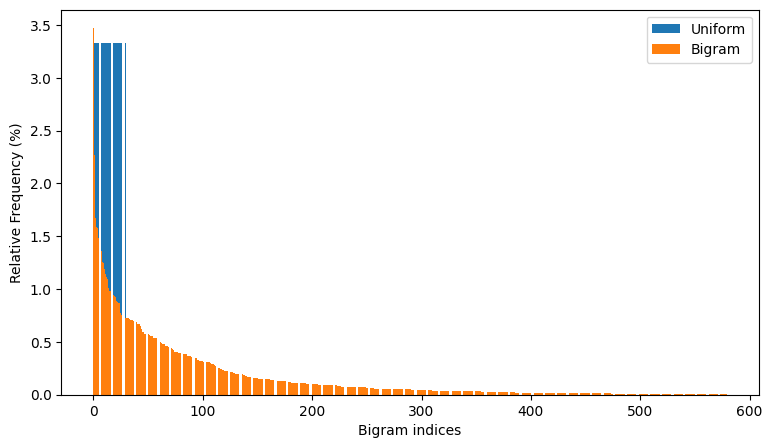

In [325]:
# Plot PDF's
fig = plt.figure(figsize=(9, 5))
plt.bar(range(len(uniform_prob)), uniform_prob, label="Uniform")
plt.bar(range(len(list(token_prob.values()))), list(token_prob.values()), label="Bigram")
plt.xlabel("Bigram indices")
plt.ylabel("Relative Frequency (%)")
plt.legend()
plt.show()

As can be seen from the above figure that bigram pdf significantly differs from the uniform pdf, which indicates that we've learnt important distribution information from the training data.